In [1]:
# dependencies
from collections import Counter
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# kNN

Accuracy: 0.83


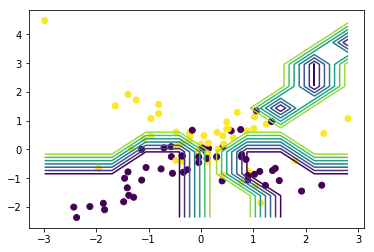

In [2]:
class KNN:
    def __init__(self, X, Y, k=3):
        self.X = X
        self.Y = Y
        self.k = k
        
    def predict(self, x_input):

        distributions = []
        # calculate distance between every point
        for i, x in enumerate(self.X):
            d = np.linalg.norm(np.array(x)- np.array(x_input))
            distributions.append([d, x, self.Y[i]])

        # pick the most common of k closes points
        results = [i[2] for i in sorted(distributions)[:self.k]]
        result = Counter(results).most_common(1)[0][0]
        confidence = Counter(results).most_common(1)[0][1]/self.k

        return result, confidence

# create dataset    
X, Y = datasets.make_classification(n_samples=100, n_features=2,n_informative=2, n_redundant=0, n_classes=2, class_sep=0.5)

knn = KNN(X,Y)

# predict on train set
correct = 0
for x, y in zip(X, Y):
    cls, conf = knn.predict(x)
    if cls == y:
        correct +=1
print('Accuracy: {0}'.format(correct/len(X)))
    
# plot data
plt.scatter(X[:,0],X[:,1],c=Y)

# plot classification boundaries
x_axis = np.linspace(min(X[:,0]), max(X[:,0]), 10)
y_axis = np.linspace(min(X[:,1]), max(X[:,1]), 10)
X_grid, Y_grid = np.meshgrid(x_axis, y_axis)
Z = np.zeros_like(X_grid)
# predict on mesh grid
for i in range(X_grid.shape[0]):
    for j in range(X_grid.shape[1]):
        Z[i,j], _ = knn.predict([X_grid[i,j],Y_grid[i,j]])
plt.contour(X_grid,Y_grid,Z)
plt.show()

# Linear regression

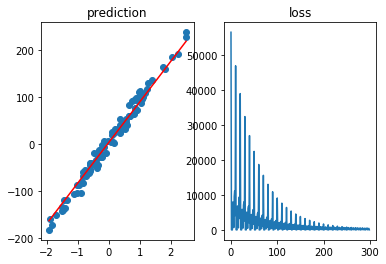

In [3]:
# generate dataset
X, Y = datasets.make_regression(n_samples=100, n_features=1, noise=10, bias=2)

# trainable variables
w = np.random.randn(1).reshape(1,-1)
b = [0]

# hyper params
alpha = 0.001

i = 0
losses = []
# Perform Gradient Descent
for _ in range(3000):
    train_x, train_y = X[i], Y[i]
    
    # forward prop
    y_pred = np.dot(train_x,w) + b
    
    # backward prop
    dl = -1 * (train_y - y_pred)
    dw = np.dot(train_x,dl)
    db = dl
    
    new_w = w - alpha * dw
    new_b = b - alpha * db
    
    i = (i + 1) % len(X)
    w = new_w
    b = new_b
    
    if i % 10 == 0:
        loss = np.mean((train_y - y_pred)**2)
        losses.append(loss)

plt.figure(1)

# plot data
plt.subplot(121)
plt.title('prediction')
plt.scatter(X,Y)

# plot trained model regression line
xs = np.linspace(min(X), max(X), 1000).reshape(-1, X.shape[1])
ys = np.dot(xs,w) + b
plt.plot(xs,ys, color='red')

plt.subplot(122)
plt.title('loss')
plt.plot(losses)
plt.show()

# Logistic regression

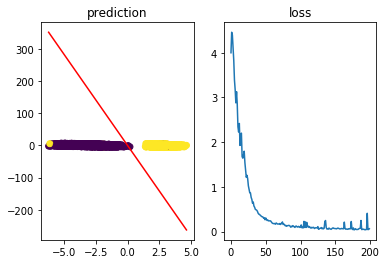

In [34]:
# generate dataset
X, Y = datasets.make_classification(n_samples=10000, n_features=2,n_informative=2, n_redundant=0, n_classes=2, class_sep=3)
Ynew=Y
Y = Y.reshape(-1,1)

# trainable variables
w = np.random.randn(2).reshape(-1,1)
b = [0]

# hyperparameters
alpha = 0.001
BATCH_SIZE = 20

# activation function
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# Perform Gradient Descent
i = 0
losses = []
for _ in range(200):
    train_x, train_y = X[i:i+BATCH_SIZE], Y[i:i+BATCH_SIZE]
    
    # forward prop
    y_pred = sigmoid(np.dot(train_x,w) + b)
    
    # backprop
    dl = (y_pred - train_y)
    dw = np.dot(train_x.T, dl)
    db = np.mean(dl, axis=0)
    
    new_w = w - alpha * dw
    new_b = b - alpha * db
    
    w = new_w
    b = new_b
    i = (i + BATCH_SIZE) % len(X)
    
    # logistic cross-entropy error
    loss = -1 * np.mean(train_y * np.log(y_pred) + (1 - train_y) * np.log(1 - y_pred))
    losses.append(loss)
    
plt.figure(1)

# plot data
plt.subplot(121)
plt.title('prediction')
plt.scatter(X[:,0],X[:,1], c=Ynew)

# plot trained model regression line
xs = np.linspace(min(X[:,0]), max(X[:,0]), 1000)
ys = -(w[0]/w[1])*xs - b/w[1]
plt.plot(xs,ys, color='red')

plt.subplot(122)
plt.title('loss')
plt.plot(losses)
plt.show()

In [29]:
Y

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
    